# Import Python Packages and Environment Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from datetime import date
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
%matplotlib inline

# Importing and Analyzing the Train and Test CSVs

In [4]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Preprocessing 

In [8]:
lot_frontage_mean = df['LotFrontage'].mean()
df['LotFrontage'].fillna(lot_frontage_mean, inplace = True)
print('Replaced the missing values for the LotFrontage Column with it\'s Mean: ' + str(lot_frontage_mean))

Replaced the missing values for the LotFrontage Column with it's Mean: 70.04995836802665


In [9]:
test_lot_frontage_mean = df_test['LotFrontage'].mean()
df_test['LotFrontage'].fillna(test_lot_frontage_mean, inplace = True)
print('Replaced the missing values in the Test Set for the LotFrontage Column with it\'s Mean: ' + str(test_lot_frontage_mean))

Replaced the missing values in the Test Set for the LotFrontage Column with it's Mean: 68.58035714285714


In [10]:
print(df['Alley'].unique())
print(df_test['Alley'].unique())

# df.drop('Alley', axis = 1, inplace = True)
# df_test.drop('Alley', axis = 1, inplace = True)
df['Alley'].fillna('None', inplace = True)
df_test['Alley'].fillna('None', inplace = True)

[nan 'Grvl' 'Pave']
[nan 'Pave' 'Grvl']


In [11]:
df['MasVnrArea'].fillna(0, inplace = True)
df_test['MasVnrArea'].fillna(0, inplace = True)
print('Replaced the missing values for the MasVnrArea Column with 0')

Replaced the missing values for the MasVnrArea Column with 0


In [12]:
df['MasVnrType'].fillna('None', inplace = True)
df_test['MasVnrType'].fillna('None', inplace = True)

print('Replaced the missing values for the MasVnrArea Column with None')
print(df['MasVnrType'].unique())
print(df_test['MasVnrType'].unique())

Replaced the missing values for the MasVnrArea Column with None
['BrkFace' 'None' 'Stone' 'BrkCmn']
['None' 'BrkFace' 'Stone' 'BrkCmn']


In [13]:
print(df['FireplaceQu'].unique())
print(df_test['FireplaceQu'].unique())

# df.drop('FireplaceQu', axis = 1, inplace = True)
# df_test.drop('FireplaceQu', axis = 1, inplace = True)

df['FireplaceQu'].fillna('None', inplace = True)
df_test['FireplaceQu'].fillna('None', inplace = True)

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']


In [14]:
print(df['GarageType'].unique())
print(df['GarageFinish'].unique())
print(df['GarageQual'].unique())
print(df['GarageCond'].unique())

df['GarageType'].fillna('None', inplace = True)
df['GarageFinish'].fillna('None', inplace = True)
df['GarageQual'].fillna('None', inplace = True)
df['GarageCond'].fillna('None', inplace = True)

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [15]:
print(df_test['GarageType'].unique())
print(df_test['GarageFinish'].unique())
print(df_test['GarageQual'].unique())
print(df_test['GarageCond'].unique())

df_test['GarageType'].fillna('None', inplace = True)
df_test['GarageFinish'].fillna('None', inplace = True)
df_test['GarageQual'].fillna('None', inplace = True)
df_test['GarageCond'].fillna('None', inplace = True)

['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']
['Unf' 'Fin' 'RFn' nan]
['TA' nan 'Fa' 'Gd' 'Po']
['TA' nan 'Fa' 'Gd' 'Po' 'Ex']


In [16]:
print(df['BsmtQual'].unique())
print(df['BsmtCond'].unique())
print(df['BsmtExposure'].unique())
print(df['BsmtFinType1'].unique())
print(df['BsmtFinType2'].unique())

df['BsmtQual'].fillna('None', inplace = True)
df['BsmtCond'].fillna('None', inplace = True)
df['BsmtExposure'].fillna('None', inplace = True)
df['BsmtFinType1'].fillna('None', inplace = True)
df['BsmtFinType2'].fillna('None', inplace = True)

['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [17]:
print(df_test['BsmtQual'].unique())
print(df_test['BsmtCond'].unique())
print(df_test['BsmtExposure'].unique())
print(df_test['BsmtFinType1'].unique())
print(df_test['BsmtFinType2'].unique())

df_test['BsmtQual'].fillna('None', inplace = True)
df_test['BsmtCond'].fillna('None', inplace = True)
df_test['BsmtExposure'].fillna('None', inplace = True)
df_test['BsmtFinType1'].fillna('None', inplace = True)
df_test['BsmtFinType2'].fillna('None', inplace = True)

['TA' 'Gd' 'Ex' 'Fa' nan]
['TA' 'Po' 'Fa' 'Gd' nan]
['No' 'Gd' 'Mn' 'Av' nan]
['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]
['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]


In [18]:
# print(df['BsmtFinSF1'].unique())
# print(df['BsmtFinSF2'].unique())
# print(df['BsmtUnfSF'].unique())
# print(df['TotalBsmtSF'].unique())
# print(df['BsmtFullBath'].unique())
# print(df['BsmtHalfBath'].unique())

df['BsmtFinSF1'].fillna(0, inplace = True)
df['BsmtFinSF2'].fillna(0, inplace = True)
df['BsmtUnfSF'].fillna(0, inplace = True)
df['TotalBsmtSF'].fillna(0, inplace = True)
df['BsmtFullBath'].fillna(0, inplace = True)
df['BsmtHalfBath'].fillna(0, inplace = True)

In [19]:
# print(df_test['BsmtFinSF1'].unique())
# print(df_test['BsmtFinSF2'].unique())
# print(df_test['BsmtUnfSF'].unique())
# print(df_test['TotalBsmtSF'].unique())
# print(df_test['BsmtFullBath'].unique())
# print(df_test['BsmtHalfBath'].unique())

df_test['BsmtFinSF1'].fillna(0, inplace = True)
df_test['BsmtFinSF2'].fillna(0, inplace = True)
df_test['BsmtUnfSF'].fillna(0, inplace = True)
df_test['TotalBsmtSF'].fillna(0, inplace = True)
df_test['BsmtFullBath'].fillna(0, inplace = True)
df_test['BsmtHalfBath'].fillna(0, inplace = True)

In [20]:
print(df['GarageYrBlt'].unique())
GarageYrBlt = df['GarageYrBlt'].dropna().median()
print('Replacing Missing Values for the Garage Year Built Column with it\'s Median ' + str(GarageYrBlt))

df['GarageYrBlt'].fillna(GarageYrBlt, inplace = True)

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
Replacing Missing Values for the Garage Year Built Column with it's Median 1980.0


In [21]:
print(df_test['GarageYrBlt'].unique())
GarageYrBlt = df_test['GarageYrBlt'].dropna().median()
print('Replacing Missing Values for the Garage Year Built Column with it\'s Median ' + str(GarageYrBlt))

df_test['GarageYrBlt'].fillna(GarageYrBlt, inplace = True)

[1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006. 2004. 1920. 1974. 2000. 2010. 1967. 1978. 1966.
 1964.   nan 1994. 1949. 1959. 1956. 1952. 1955. 1989. 1950. 1960. 1963.
 1900. 1957. 1938. 1948. 1962. 1928. 1930. 1926. 1939. 1973. 1942. 1979.
 1923. 1915. 1917. 1940. 1910. 1969. 1968. 1977. 1945. 1987. 1947. 1954.
 1941. 1951. 1896. 1976. 2008. 2007. 1965. 2001. 1972. 1984. 1985. 1996.
 1995. 1980. 1986. 1981. 1982. 1991. 1988. 1953. 1924. 1927. 1946. 1934.
 1983. 1916. 1918. 1937. 1932. 1935. 1925. 1921. 1895. 1922. 2207. 1936.
 1943. 1919.]
Replacing Missing Values for the Garage Year Built Column with it's Median 1979.0


In [22]:
print(df['GarageArea'].unique())
print(df['GarageQual'].unique())

df['GarageArea'].fillna(0, inplace = True)
df['GarageQual'].fillna(0, inplace = True)

[ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494  457  818  463  604  389  538  520  309  429  673  884  868  492
  413  924 1053  439  671  338  573  732  505  575  626  898  529  685
  281  539  418  588  282  375  683  843  552  870  888  746  708  513
 1025  656  872  292  441  189  880  676  301  474  706  617  445  200
  592 

In [23]:
print(df_test['GarageArea'].unique())
print(df_test['GarageQual'].unique())

df_test['GarageArea'].fillna(0, inplace = True)
df_test['GarageQual'].fillna(0, inplace = True)

[ 730.  312.  482.  470.  506.  440.  420.  393.  525.  511.  264.  320.
  308.  751.  868.  678.  958.  756.  484.  430.  437.  400.  433.  962.
  880.  676.  528.  429.  461.  762.  713.  588.  480.  496.  852.  592.
  596.  535.  660.  441.  490.  504.  517.    0.  315.  576.  620.  263.
  318.  305.  280.  240.  551.  780.  288.  624.  363.  200.  572.  180.
  365.  231.  450.  416.  591.  690.  522.  467.  209.  366. 1017.  615.
  580.  513.  850.  621.  319.  336.  352.  260.  399.  473.  598.  531.
  625.  330.  741.  776.  520.  686.  253.  286.  495.  616.  275.  502.
  632.  390.  564.  396.  409.  567.  529.  479.  581.  565.  478.  477.
  345.  656.  754.  864.  896.  834.  932.  640.  927.  700.  583.  886.
  871.  949.  685.  649.  539.  701.  392.  397.  436.  434.  644.  394.
  658.  410.  810.  815.  647.  623.  972.  726.  844.  492.  795.  984.
  692.  782.  711.  628.  845.  788.  559.  542.  465.  612.  732.  300.
  252.  524.  704.  561.  641.  642.  540.  527.  7

In [24]:
print(df['MiscFeature'].unique())
print(df_test['MiscFeature'].unique())

# df.drop('MiscFeature', axis = 1, inplace = True)
# df_test.drop('MiscFeature', axis = 1, inplace = True)

df['MiscFeature'].fillna('None', inplace = True)
df_test['MiscFeature'].fillna('None', inplace = True)

[nan 'Shed' 'Gar2' 'Othr' 'TenC']
[nan 'Gar2' 'Shed' 'Othr']


In [25]:
df.drop('Utilities', axis = 1, inplace = True)
df_test.drop('Utilities', axis = 1, inplace = True)

In [26]:
print(df['Fence'].unique())
print(df_test['Fence'].unique())

# df.drop('Fence', axis = 1, inplace = True)
# df_test.drop('Fence', axis = 1, inplace = True)

df['Fence'].fillna('None', inplace = True)
df_test['Fence'].fillna('None', inplace = True)

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']


In [27]:
print(df['PoolQC'].unique())
print(df_test['PoolQC'].unique())

# df.drop('PoolQC', axis = 1, inplace = True)
# df_test.drop('PoolQC', axis = 1, inplace = True)

df['PoolQC'].fillna('None', inplace = True)
df_test['PoolQC'].fillna('None', inplace = True)

[nan 'Ex' 'Fa' 'Gd']
[nan 'Ex' 'Gd']


In [28]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [29]:
print(df_test['MSZoning'].unique())
MSZoning = df.MSZoning.mode()
df_test['MSZoning'].fillna(MSZoning[0], inplace = True)

['RH' 'RL' 'RM' 'FV' 'C (all)' nan]


In [30]:
print(df_test['Exterior1st'].unique())
Exterior1st = df.Exterior1st.mode()
df_test['Exterior1st'].fillna(Exterior1st[0], inplace = True)

['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']


In [31]:
print(df_test['Exterior2nd'].unique())
Exterior2nd = df.Exterior2nd.mode()
df_test['Exterior2nd'].fillna(Exterior2nd[0], inplace = True)

['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']


In [32]:
print(df_test['KitchenQual'].unique())
KitchenQual = df.KitchenQual.mode()
df_test['KitchenQual'].fillna(KitchenQual[0], inplace = True)

['TA' 'Gd' 'Ex' 'Fa' nan]


In [33]:
print(df_test['Functional'].unique())
Functional = df.Functional.mode()
df_test['Functional'].fillna(Functional[0], inplace = True)

['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' nan]


In [34]:
print(df_test['SaleType'].unique())
SaleType = df.SaleType.mode()
df_test['SaleType'].fillna(SaleType[0], inplace = True)

['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan]


In [35]:
print(df_test['GarageCars'].unique())

[ 1.  2.  3.  0.  4.  5. nan]


In [36]:
df_test['GarageCars'].fillna('None', inplace = True)
df_test[df_test['GarageCars'] == 'None'].GarageArea 

1116    0.0
Name: GarageArea, dtype: float64

In [37]:
df_test['GarageCars'].replace(to_replace = ['None'], value = np.nan, inplace=True)
df_test['GarageCars'].fillna(0, inplace = True)
print(df_test['GarageCars'].unique())

[1. 2. 3. 0. 4. 5.]


In [38]:
#df_test.dropna(inplace = True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Data Visualizations

Text(0.5, 1.0, 'Sale Price')

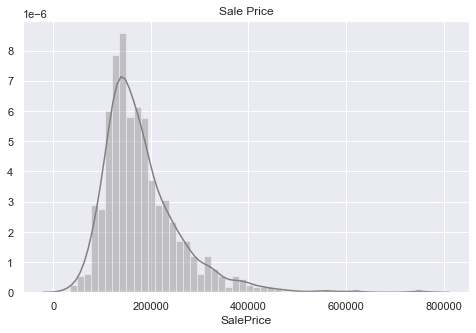

In [39]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(8,5)})

sns.distplot(a = df['SalePrice'], bins = 50, color = 'gray', vertical = False
            ).set_title('Sale Price')

### Heatmap 

In [40]:
corr = df.corr()

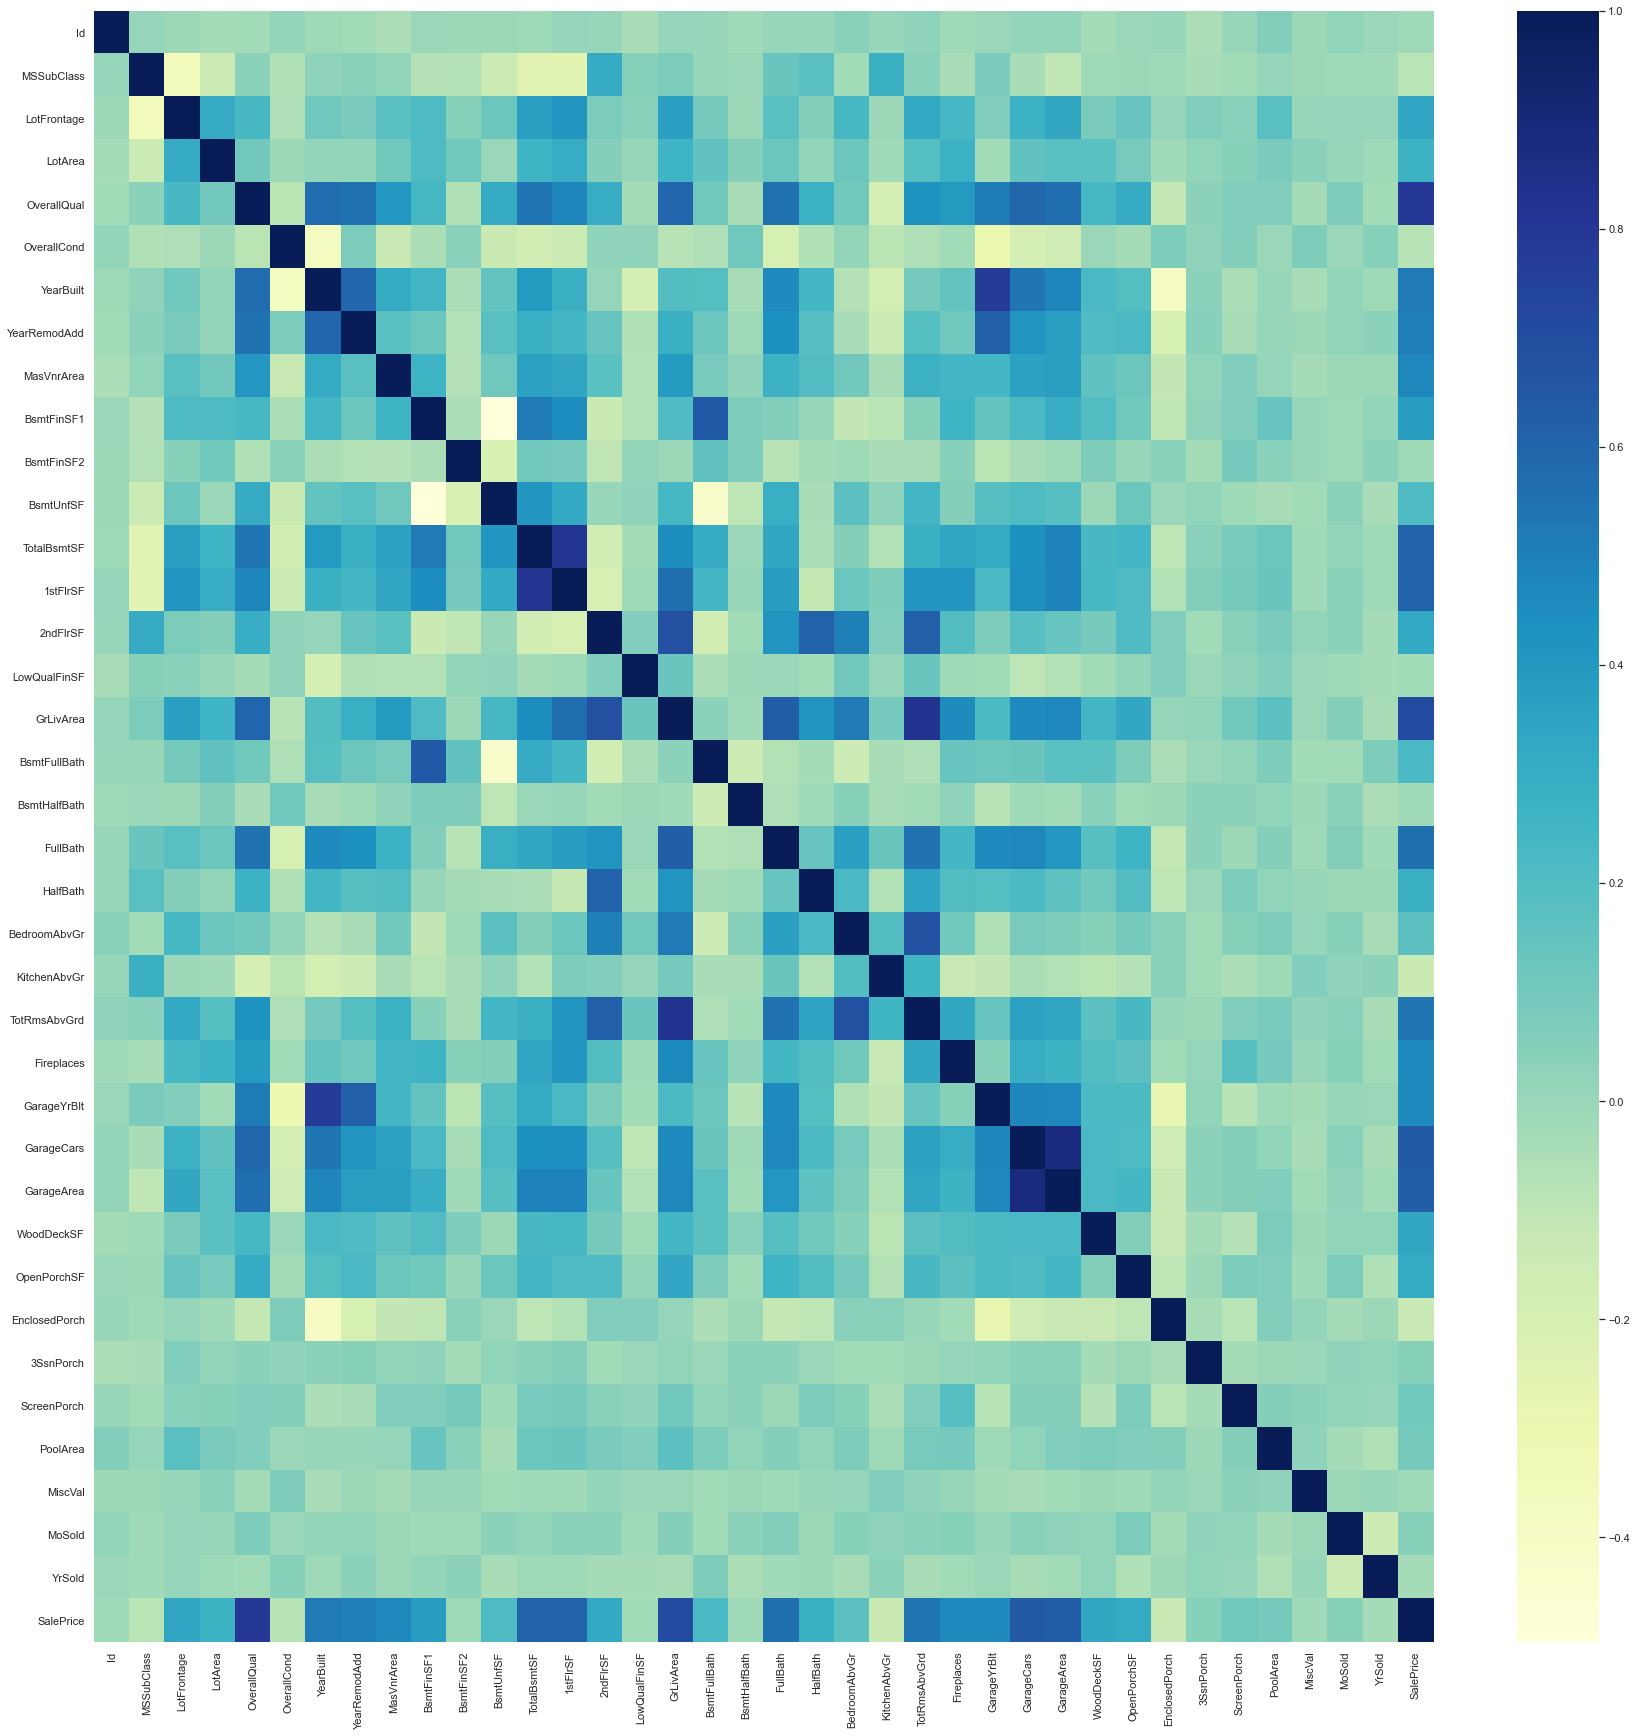

In [41]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(30,30)})

sns.heatmap(corr, cmap="YlGnBu")


### Column: LotArea
Lot size in square feet

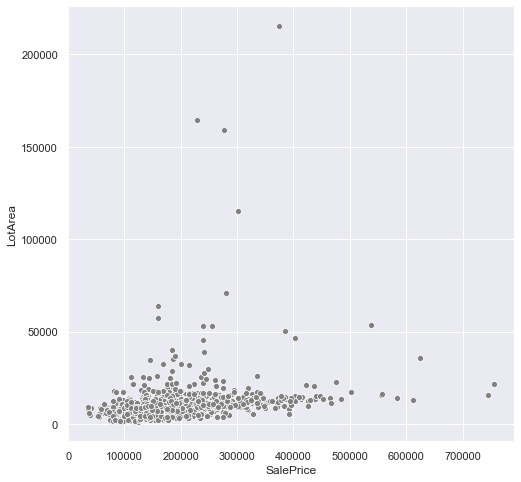

In [42]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(8, 8)})
sns.scatterplot(x = "SalePrice", y = "LotArea", data = df, color = "gray")

### Column: MSZoning
Identifies the general zoning classification of the sale.

- A - Agriculture
- C - Commercial
- FV - Floating Village Residential
- I - Industrial
- RH - Residential High Density
- RL - Residential Low Density
- RP - Residential Low Density Park 
- RM - Residential Medium Density

[Text(0.5, 0, 'Residential Low Density, Residential Medium Density, Commercial, Floating Village Residential, Residential High Density')]

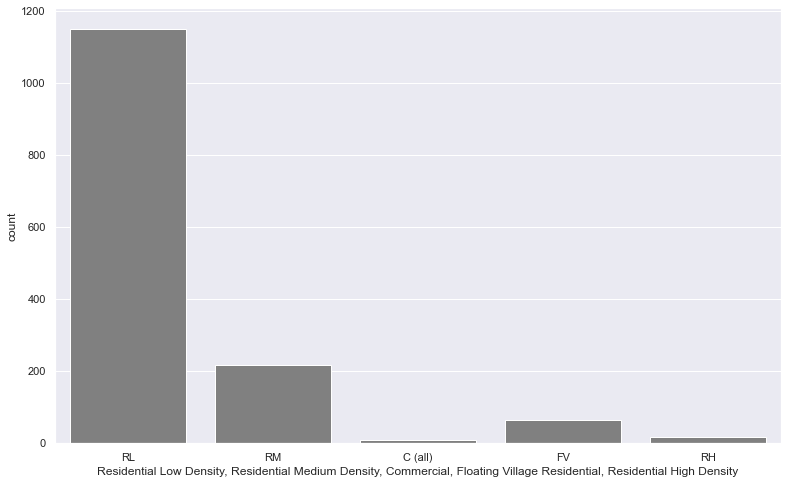

In [43]:
sns.set(rc={'figure.figsize':(13, 8)})
ax = sns.countplot(df['MSZoning'], color = 'gray')
ax.set(xlabel = "Residential Low Density, Residential Medium Density, Commercial, Floating Village Residential, Residential High Density")

### Column: LotFrontage
Linear feet of street connected to property

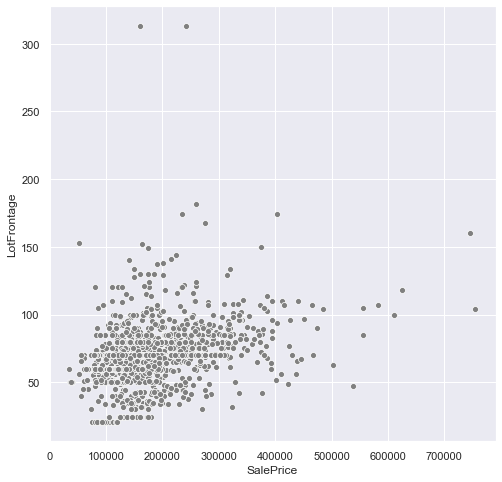

In [44]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.scatterplot(x = "SalePrice", y = "LotFrontage", data = df, color = "gray")

### Column: Street
Type of road access to property
- Grvl - Gravel
- Pave - Paved

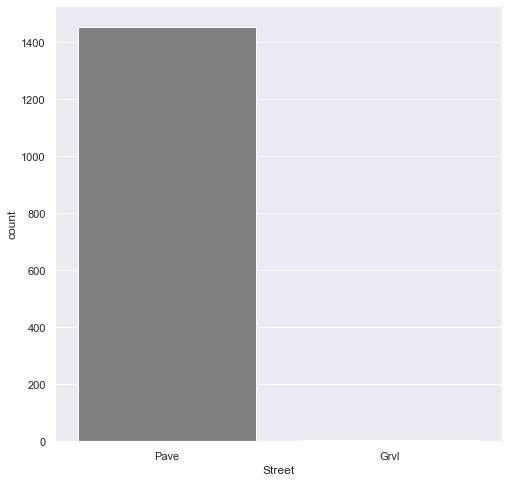

In [45]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.countplot(df['Street'], color = 'gray')

### Column: LotShape
General shape of property

- Reg - Regular	
- IR1 - Slightly irregular
- IR2 - Moderately Irregular
- IR3 - Irregular

[Text(0.5, 0, 'Regular, Slightly irregular, Moderately Irregular, Irregular')]

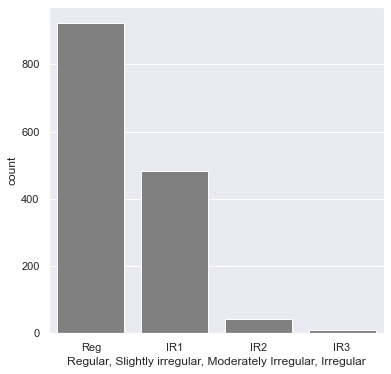

In [46]:
sns.set(rc={'figure.figsize':(6, 6)})
ax = sns.countplot(df['LotShape'], color = 'gray')
ax.set(xlabel = "Regular, Slightly irregular, Moderately Irregular, Irregular")

### Column: LandContour
Flatness of the property

- Lvl - Near Flat/Level
- Bnk - Banked - Quick and significant rise from /street grade to building
- HLS - Hillside - Significant slope from side to side
- Low - Depression

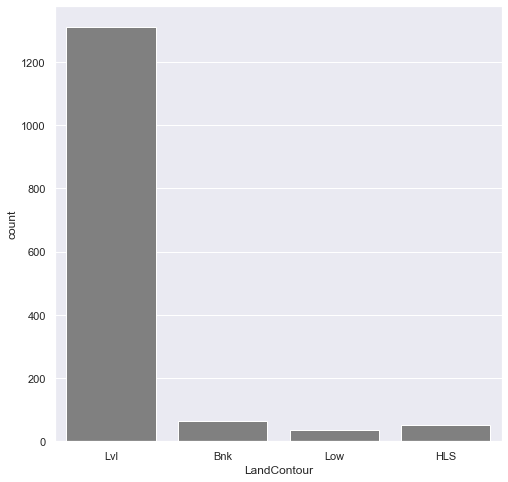

In [47]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.countplot(df['LandContour'], color = 'gray')

### Column: LotConfig
Lot configuration

- Inside - Inside lot
- Corner - Corner lot
- CulDSac - Cul-de-sac
- FR2 - Frontage on 2 sides of property
- FR3 - Frontage on 3 sides of property

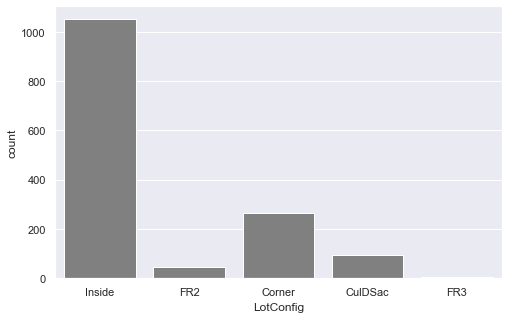

In [48]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.countplot(df['LotConfig'], color = 'gray')

### Column: LandSlope
Slope of property

- Gtl - Gentle slope
- Mod - Moderate Slope	
- Sev - Severe Slope

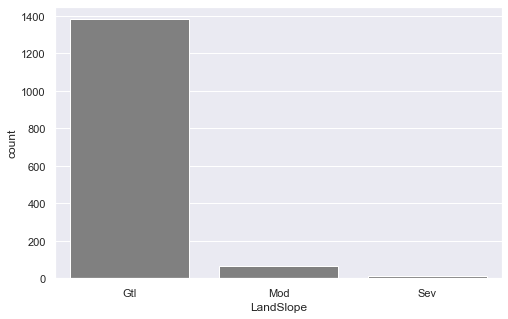

In [49]:
sns.countplot(df['LandSlope'], color = 'gray')

### Column: Neighborhood
Physical locations within Ames city limits

- Blmngtn	- Bloomington Heights
- Blueste	- Bluestem
- BrDale	- Briardale
- BrkSide	- Brookside
- ClearCr	- Clear Creek
- CollgCr	- College Creek
- Crawfor	- Crawford
- Edwards	- Edwards
- Gilbert	- Gilbert
- IDOTRR	- Iowa DOT and Rail Road
- MeadowV	- Meadow Village
- Mitchel	- Mitchell
- Names	- North Ames
- NoRidge	- Northridge
- NPkVill	- Northpark Villa
- NridgHt	- Northridge Heights
- NWAmes	- Northwest Ames
- OldTown	- Old Town
- SWISU	- South & West of Iowa State University
- Sawyer	- Sawyer
- SawyerW	- Sawyer West
- Somerst	- Somerset
- StoneBr	- Stone Brook
- Timber	- Timberland
- Veenker	- Veenker

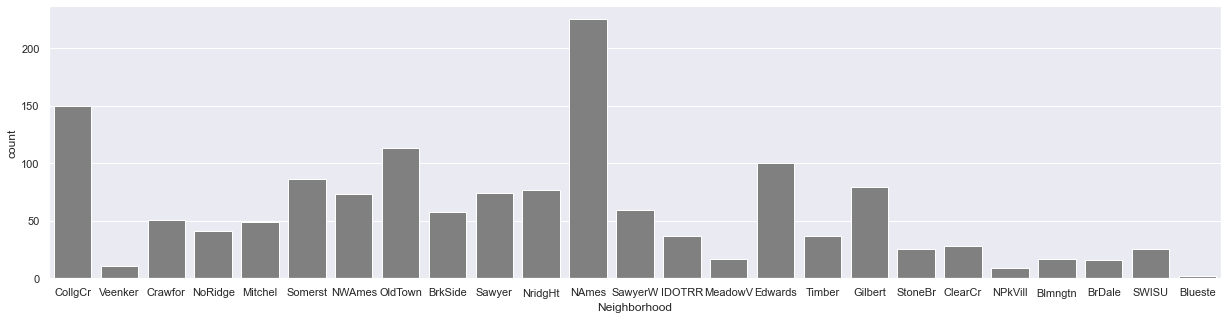

In [50]:
sns.set(rc={'figure.figsize':(21, 5)})
sns.countplot(df['Neighborhood'], color = 'gray')

### Column: Condition1
Proximity to various conditions
	
- Artery -	Adjacent to arterial street
- Feedr	- Adjacent to feeder street	
- Norm	- Normal	
- RRNn	- Within 200' of North-South Railroad
- RRAn	- Adjacent to North-South Railroad
- PosN	- Near positive off-site feature--park, greenbelt, etc.
- PosA	- Adjacent to postive off-site feature
- RRNe -	Within 200' of East-West Railroad
- RRAe -	Adjacent to East-West Railroad

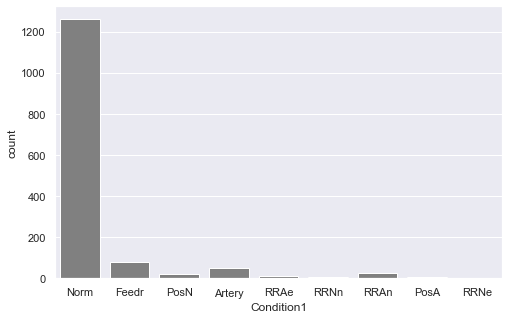

In [51]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.countplot(df['Condition1'], color = 'gray')

### Column: BldgType
Type of dwelling

- 1Fam - Single-family Detached	
- 2FmCon - Two-family Conversion; originally built as one-family dwelling
- Duplx - Duplex
- TwnhsE - Townhouse End Unit
- TwnhsI - Townhouse Inside Unit

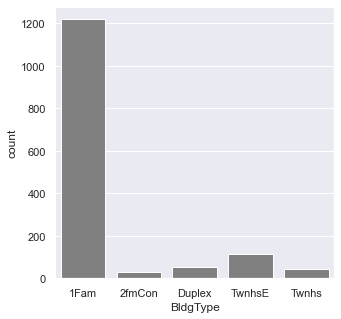

In [52]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.countplot(df['BldgType'], color = 'gray')

### Column: HouseStyle
Style of dwelling

- 1Story - One story
- 1.5Fin - One and one-half story: 2nd level finished
- 1.5Unf - One and one-half story: 2nd level unfinished
- 2Story - Two story
- 2.5Fin - Two and one-half story: 2nd level finished
- 2.5Unf - Two and one-half story: 2nd level unfinished
- SFoyer - Split Foyer
- SLvl - Split Level

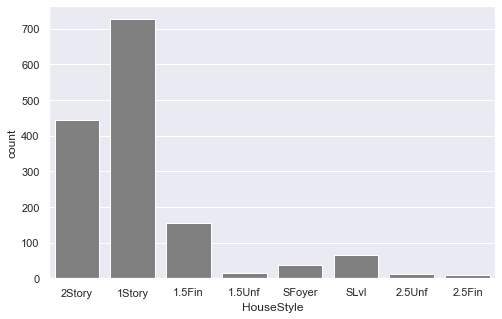

In [53]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.countplot(df['HouseStyle'], color = 'gray')

### Column: OverallQual
Rates the overall material and finish of the house

- 10 - Very Excellent
- 9	- Excellent
- 8	- Very Good
- 7	- Good
- 6	- Above Average
- 5	- Average
- 4	- Below Average
- 3	- Fair
- 2	- Poor
- 1 - Very Poor

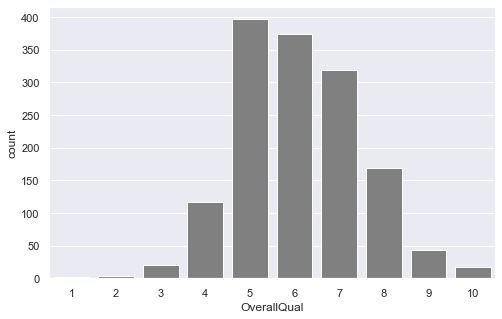

In [54]:
sns.countplot(df['OverallQual'], color = 'gray')

### Column: OverallCond
Rates the overall condition of the house

- 10 - Very Excellent
- 9	- Excellent
- 8	- Very Good
- 7	- Good
- 6	- Above Average
- 5	- Average
- 4	- Below Average
- 3	- Fair
- 2	- Poor
- 1 - Very Poor 

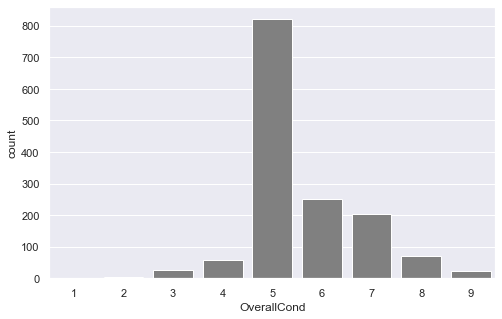

In [55]:
sns.countplot(df['OverallCond'], color = 'gray')

### Column: YearBuilt
Original construction date

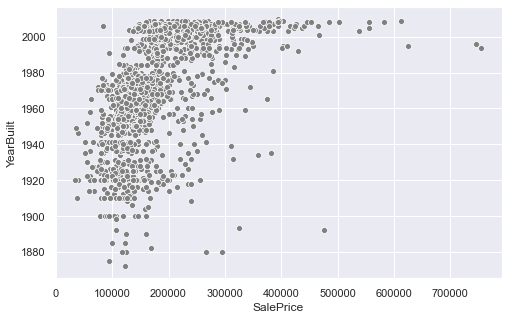

In [56]:
sns.scatterplot(x = "SalePrice", y = "YearBuilt", data = df, color = "gray")

### Column: YearRemodAdd
Remodel date (same as construction date if no remodeling or additions)

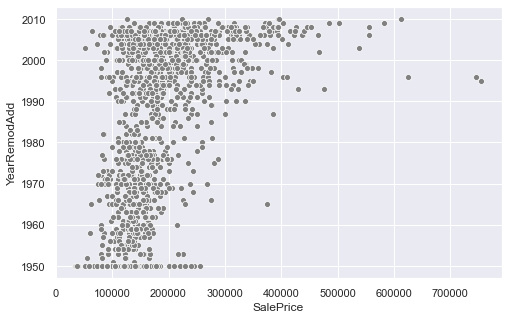

In [57]:
sns.scatterplot(x = "SalePrice", y = "YearRemodAdd", data = df, color = "gray")

### Column: RoofStyle
Type of roof

- Flat - Flat
- Gable - Gable
- Gambrel - Gabrel (Barn)
- Hip - Hip
- Mansard - Mansard
- Shed - Shed

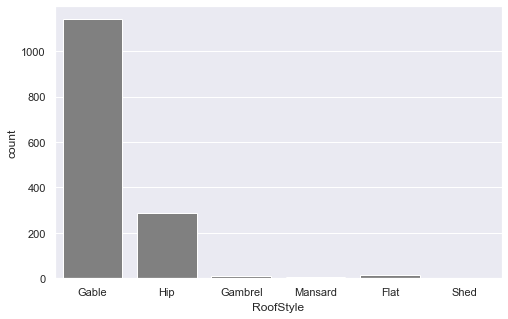

In [58]:
sns.countplot(df['RoofStyle'], color = 'gray')

### Column: RoofMatl
Roof material

- ClyTile - Clay or Tile
- CompShg - Standard (Composite) Shingle
- Membran - Membrane
- Metal - Metal
- Roll - Roll
- Tar&Grv - Gravel & Tar
- WdShake - Wood Shakes
- WdShngl - Wood Shingles

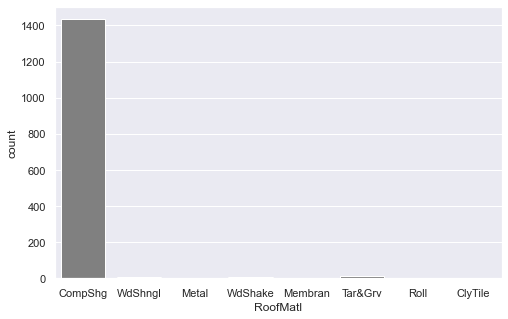

In [59]:
sns.countplot(df['RoofMatl'], color = 'gray')

### Column: Exterior1st
Exterior covering on house

- AsbShng - Asbestos Shingles
- AsphShn - Asphalt Shingles
- BrkComm - Brick Common
- BrkFace - Brick Face
- CBlock - Cinder Block
- CemntBd - Cement Board
- HdBoard - Hard Board
- ImStucc - Imitation Stucco
- MetalSd - Metal Siding
- Other - Other
- Plywood - Plywood
- PreCast - PreCast	
- Stone - Stone
- Stucco - Stucco
- VinylSd - Vinyl Siding
- Wd Sdng - Wood Siding
- WdShing - Wood Shingles

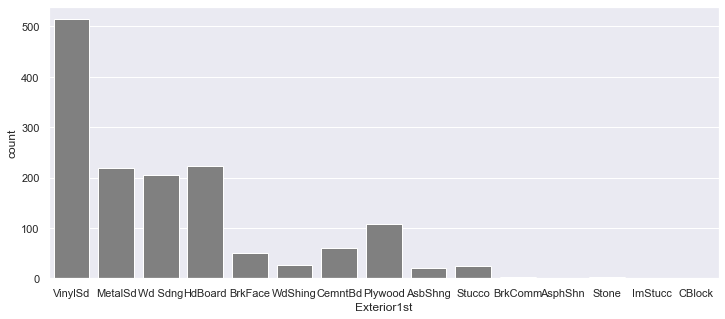

In [60]:
sns.set(rc={'figure.figsize':(12, 5)})
sns.countplot(df['Exterior1st'], color = 'gray')

### Column: Exterior2nd
Exterior covering on house (if more than one material)

- AsbShng - Asbestos Shingles
- AsphShn - Asphalt Shingles
- BrkComm - Brick Common
- BrkFace - Brick Face
- CBlock - Cinder Block
- CemntBd - Cement Board
- HdBoard - Hard Board
- ImStucc - Imitation Stucco
- MetalSd - Metal Siding
- Other - Other
- Plywood - Plywood
- PreCast - PreCast	
- Stone - Stone
- Stucco - Stucco
- VinylSd - Vinyl Siding
- Wd Sdng - Wood Siding
- WdShing - Wood Shingles

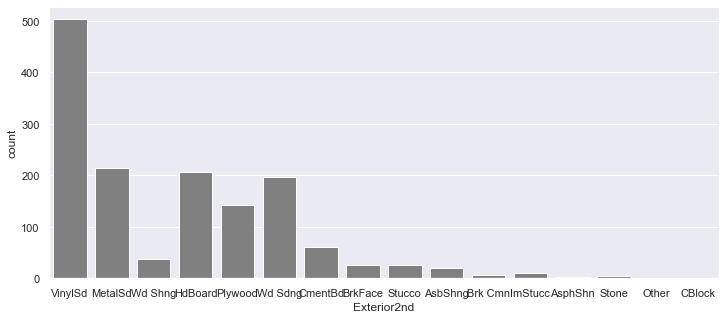

In [61]:
sns.countplot(df['Exterior2nd'], color = 'gray')

### Column: MasVnrType
Masonry veneer type

- BrkCmn - Brick Common
- BrkFace - Brick Face
- CBlock - Cinder Block
- None - None
- Stone - Stone

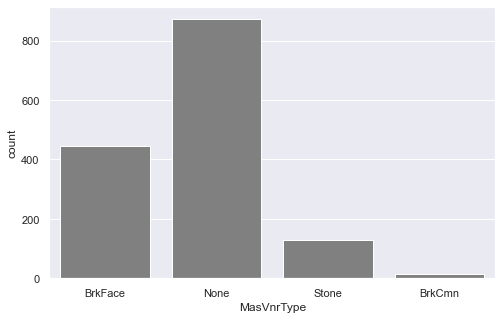

In [62]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.countplot(df['MasVnrType'], color = 'gray')

### Column: MasVnrArea
Masonry veneer area in square feet

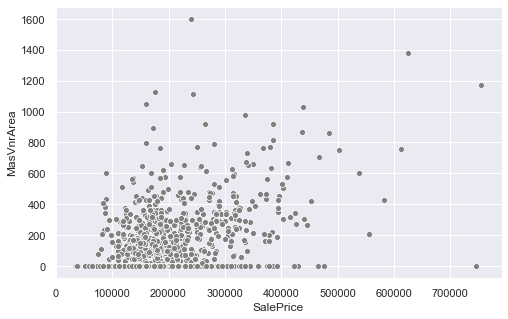

In [63]:
sns.scatterplot(x = "SalePrice", y = "MasVnrArea", data = df, color = "gray")

### Column: ExterQual
Evaluates the quality of the material on the exterior 

- Ex - Excellent
- Gd - Good
- TA - Average/Typical
- Fa - Fair
- Po - Poor

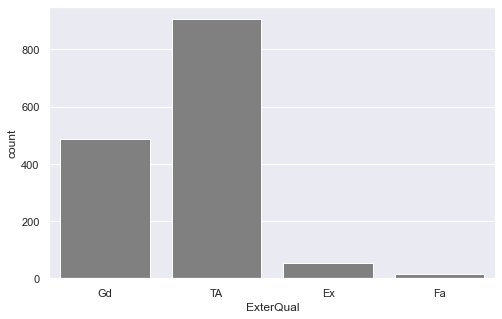

In [64]:
sns.countplot(df['ExterQual'], color = 'gray')

### Column: ExterCond
Evaluates the present condition of the material on the exterior

- Ex - Excellent
- Gd - Good
- TA - Average/Typical
- Fa - Fair
- Po - Poor

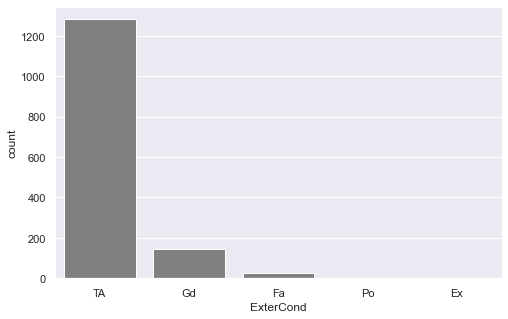

In [65]:
sns.countplot(df['ExterCond'], color = 'gray')

### Column: Foundation
Type of foundation

- BrkTil - Brick & Tile
- CBlock - Cinder Block
- PConc - Poured Contrete	
- Slab - Slab
- Stone - Stone
- Wood - Wood

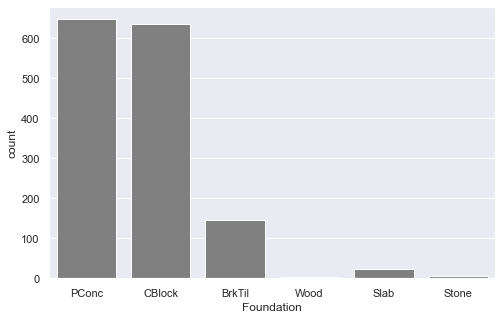

In [66]:
sns.countplot(df['Foundation'], color = 'gray')

### Column: BsmtQual
Evaluates the height of the basement

- Ex - Excellent (100+ inches)	
- Gd - Good (90-99 inches)
- TA - Typical (80-89 inches)
- Fa - Fair (70-79 inches)
- Po - Poor (<70 inches
- NA - No Basement

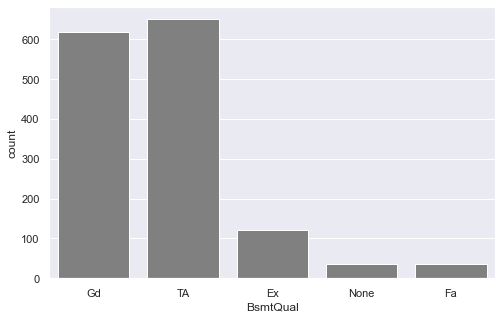

In [67]:
sns.countplot(df['BsmtQual'], color = 'gray')

### Column: BsmtCond
Evaluates the general condition of the basement

- Ex - Excellent
- Gd - Good
- TA - Typical - slight dampness allowed
- Fa - Fair - dampness or some cracking or settling
- Po - Poor - Severe cracking, settling, or wetness
- NA - No Basement

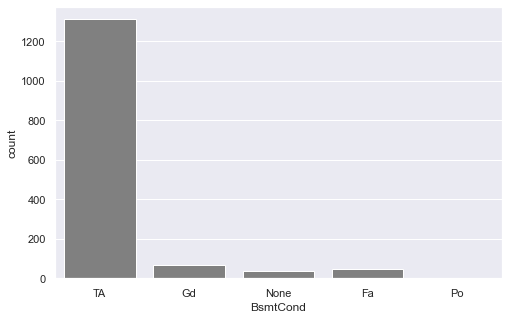

In [68]:
sns.countplot(df['BsmtCond'], color = 'gray')

### Column: BsmtExposure
Refers to walkout or garden level walls

- Gd - Good Exposure
- Av - Average Exposure (split levels or foyers typically score average or above)	
- Mn - Mimimum Exposure
- No - No Exposure
- NA - No Basement

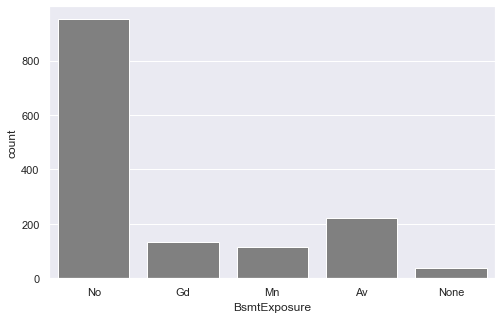

In [69]:
sns.countplot(df['BsmtExposure'], color = 'gray')

### Column: BsmtFinType1
Rating of basement finished area

- GLQ - Good Living Quarters
- ALQ - Average Living Quarters
- BLQ - Below Average Living Quarters	
- Rec - Average Rec Room
- LwQ - Low Quality
- Unf - Unfinshed
- NA - No Basement

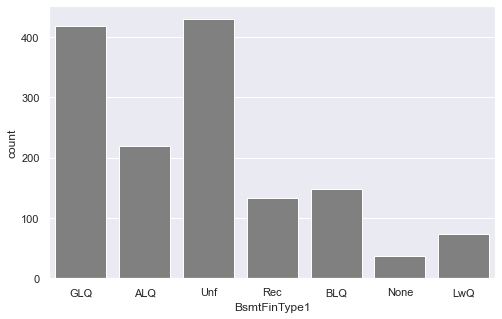

In [70]:
sns.countplot(df['BsmtFinType1'], color = 'gray')

### Column: BsmtFinSF1
Type 1 finished square feet

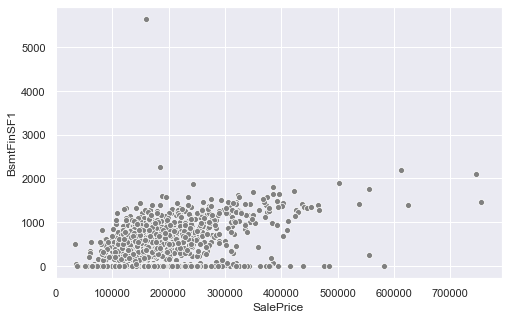

In [71]:
sns.scatterplot(x = "SalePrice", y = "BsmtFinSF1", data = df, color = "gray")

### Column: BsmtFinType2
Rating of basement finished area (if multiple types)

- GLQ - Good Living Quarters
- ALQ - Average Living Quarters
- BLQ - Below Average Living Quarters	
- Rec - Average Rec Room
- LwQ - Low Quality
- Unf - Unfinshed
- NA - No Basement

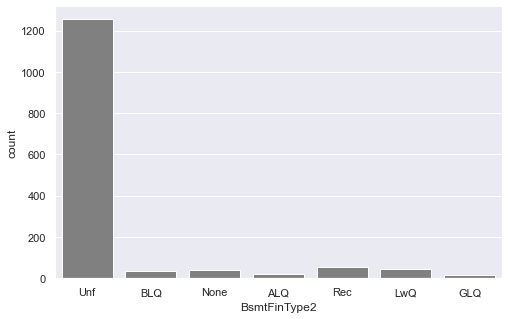

In [72]:
sns.countplot(df['BsmtFinType2'], color = 'gray')

### Column: BsmtFinSF2
Type 2 finished square feet

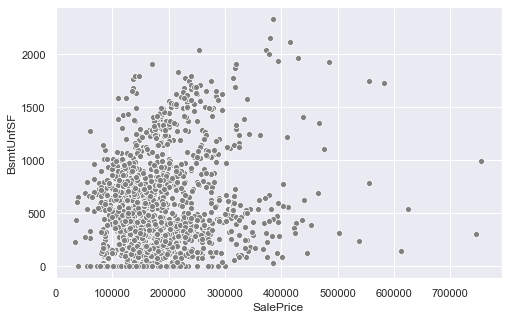

In [73]:
sns.scatterplot(x = "SalePrice", y = "BsmtUnfSF", data = df, color = "gray")

### Column: TotalBsmtSF
Total square feet of basement area

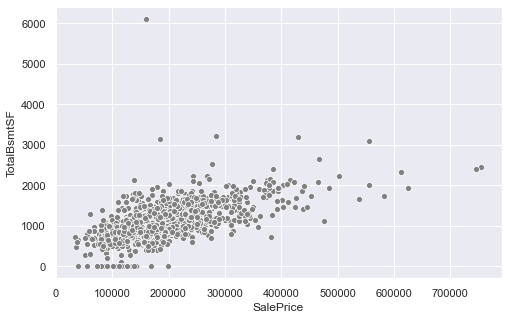

In [74]:
sns.scatterplot(x = "SalePrice", y = "TotalBsmtSF", data = df, color = "gray")

### Column: Heating
Type of heating

- Floor - Floor Furnace
- GasA - Gas forced warm air furnace
- GasW - Gas hot water or steam heat
- Grav - Gravity furnace	
- OthW - Hot water or steam heat other than gas
- Wall - Wall furnace

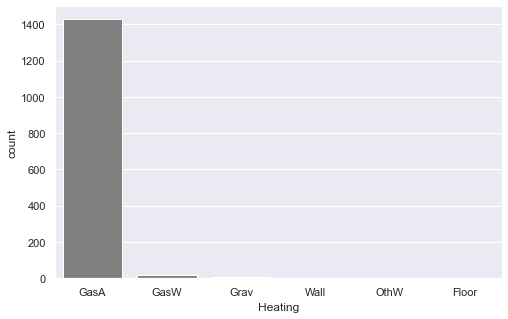

In [75]:
sns.countplot(df['Heating'], color = 'gray')

### Column: HeatingQC
Heating quality and condition

- Ex - Excellent
- Gd - Good
- TA - Average/Typical
- Fa - Fair
- Po - Poor

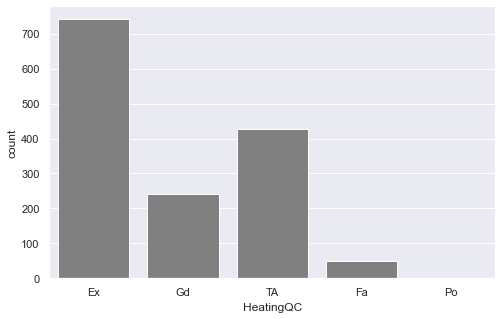

In [76]:
sns.countplot(df['HeatingQC'], color = 'gray')

### Column: CentralAir
Central air conditioning

- N - No
- Y - Yes

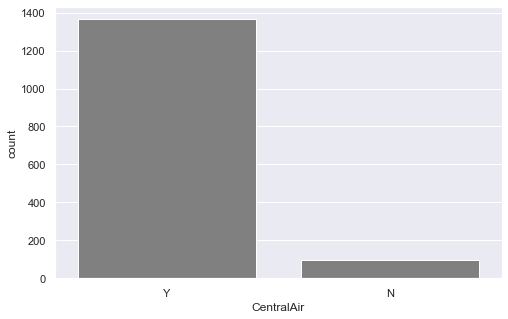

In [77]:
sns.countplot(df['CentralAir'], color = 'gray')

### Column: Electrical
Electrical system

- SBrkr - Standard Circuit Breakers & Romex
- FuseA - Fuse Box over 60 AMP and all Romex wiring (Average)	
- FuseF - 60 AMP Fuse Box and mostly Romex wiring (Fair)
- FuseP - 60 AMP Fuse Box and mostly knob & tube wiring (poor)
- Mix - Mixed

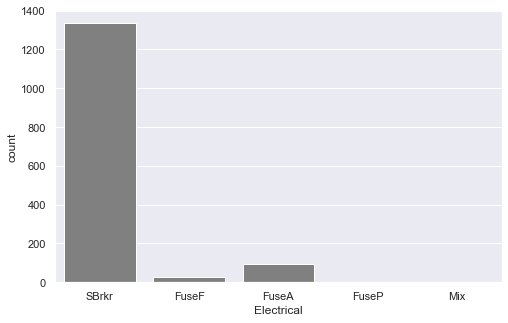

In [78]:
sns.countplot(df['Electrical'], color = 'gray')

### Column: 1stFlrSF
First Floor square feet

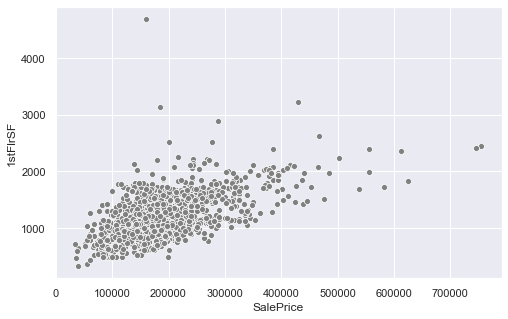

In [79]:
sns.scatterplot(x = "SalePrice", y = "1stFlrSF", data = df, color = "gray")

### Column: 2ndFlrSF
Second floor square feet

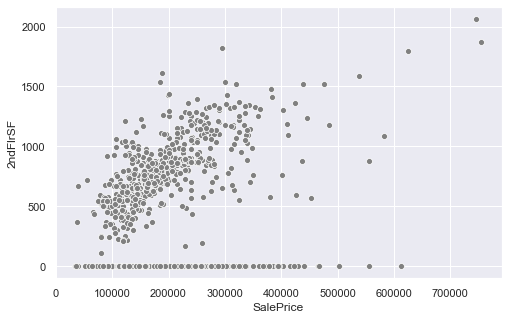

In [80]:
sns.scatterplot(x = "SalePrice", y = "2ndFlrSF", data = df, color = "gray")

### Column: LowQualFinSF
Low quality finished square feet (all floors)

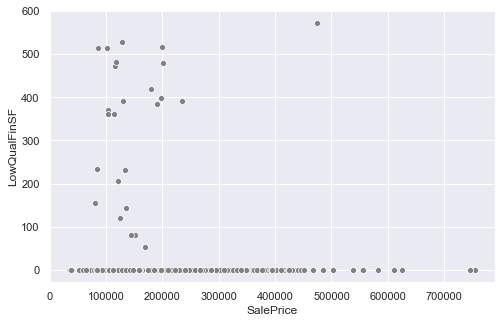

In [81]:
sns.scatterplot(x = "SalePrice", y = "LowQualFinSF", data = df, color = "gray")

### Column: GrLivArea
Above grade (ground) living area square feet

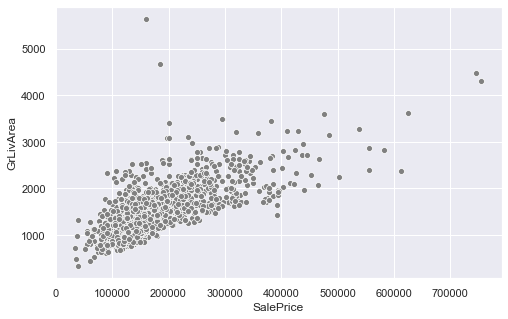

In [82]:
sns.scatterplot(x = "SalePrice", y = "GrLivArea", data = df, color = "gray")

### Column: BsmtFullBath
Basement full bathrooms

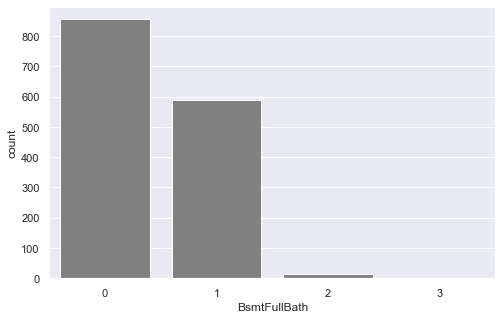

In [83]:
sns.countplot(df['BsmtFullBath'], color = 'gray')

### Column: BsmtHalfBath
Basement half bathrooms

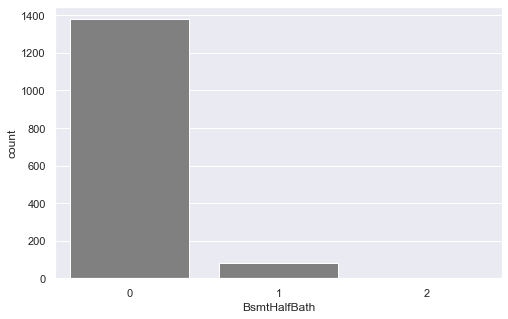

In [84]:
sns.countplot(df['BsmtHalfBath'], color = 'gray')

### Column: FullBath
Full bathrooms above grade

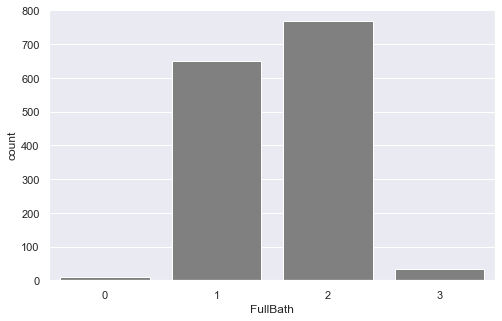

In [85]:
sns.countplot(df['FullBath'], color = 'gray')

### Column: HalfBath
Half baths above grade

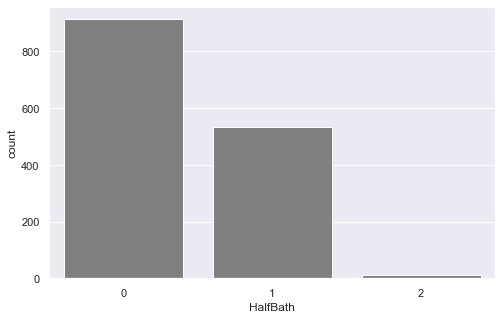

In [86]:
sns.countplot(df['HalfBath'], color = 'gray')

### Column: KitchenQual
Kitchen quality

- Ex - Excellent
- Gd - Good
- TA - Typical/Average
- Fa - Fair
- Po - Poor

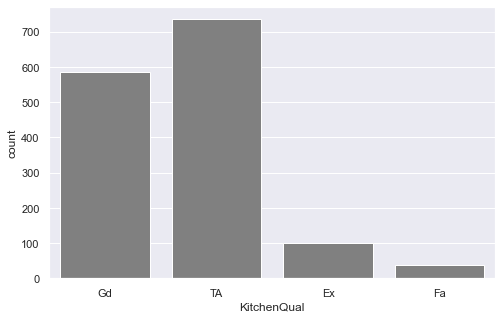

In [87]:
sns.countplot(df['KitchenQual'], color = 'gray')

### Column: TotRmsAbvGrd
Total rooms above grade (does not include bathrooms)

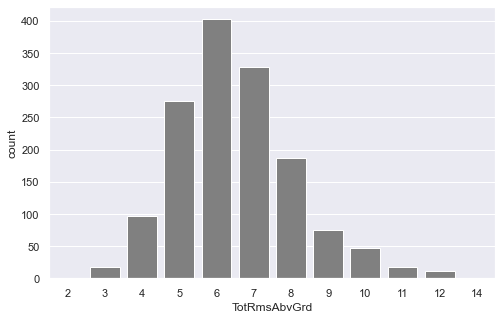

In [88]:
sns.countplot(df['TotRmsAbvGrd'], color = 'gray')

### Column: Functional: 
Home functionality (Assume typical unless deductions are warranted)

- Typ - Typical Functionality
- Min1 - Minor Deductions 1
- Min2 - Minor Deductions 2
- Mod - Moderate Deductions
- Maj1 - Major Deductions 1
- Maj2 - Major Deductions 2
- Sev - Severely Damaged
- Sal - Salvage only

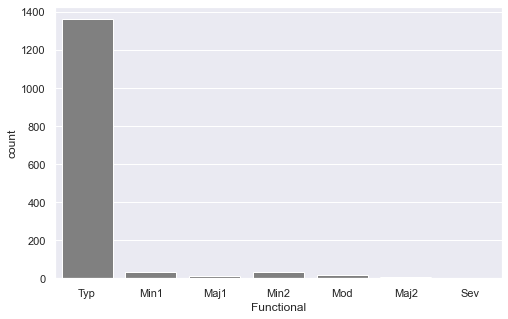

In [89]:
sns.countplot(df['Functional'], color = 'gray')

### Column: Fireplaces
Number of fireplaces

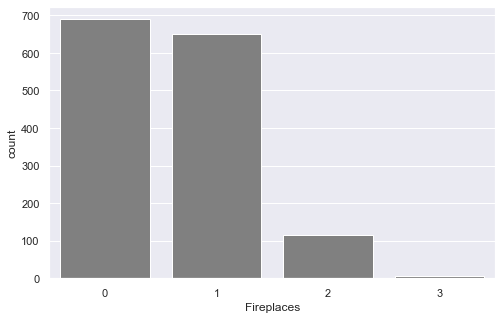

In [90]:
sns.countplot(df['Fireplaces'], color = 'gray')

### Column: GarageType
Garage location

- 2Types - More than one type of garage
- Attchd - Attached to home
- Basment - Basement Garage
- BuiltIn - Built-In (Garage part of house - typically has room above garage)
- CarPort - Car Port
- Detchd - Detached from home
- NA - No Garage

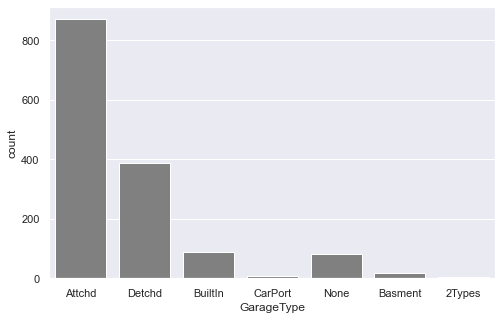

In [91]:
sns.countplot(df['GarageType'], color = 'gray')

### Column: GarageYrBlt
Year garage was built

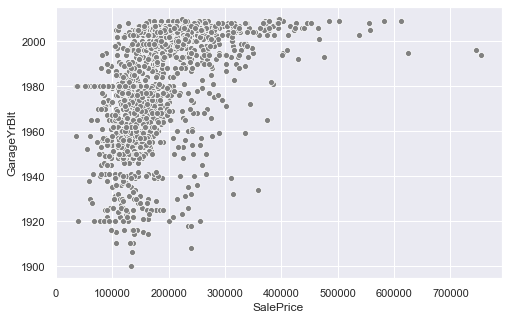

In [92]:
sns.scatterplot(x = "SalePrice", y = "GarageYrBlt", data = df, color = "gray")

### Column: GarageFinish
Interior finish of the garage

- Fin - Finished
- RFn - Rough Finished	
- Unf - Unfinished
- NA - No Garage

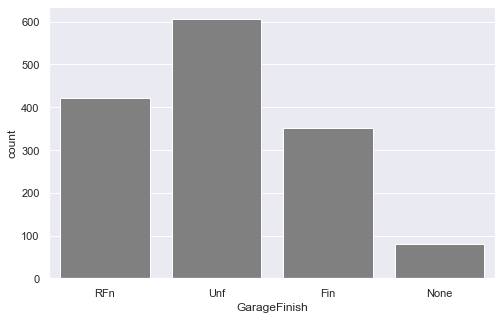

In [93]:
sns.countplot(df['GarageFinish'], color = 'gray')

### Column: GarageCars
Size of garage in car capacity

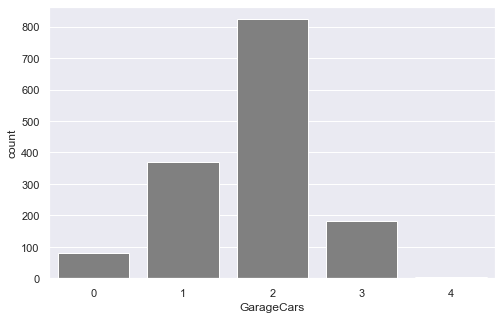

In [94]:
sns.countplot(df['GarageCars'], color = 'gray')

### Column: GarageArea
Size of garage in square feet

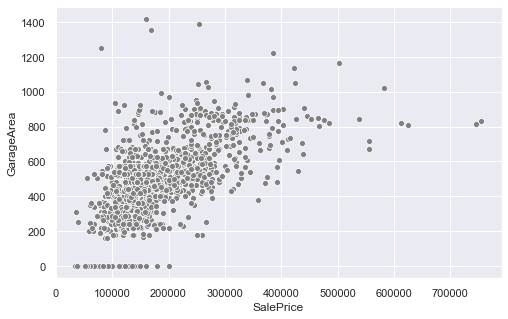

In [95]:
sns.scatterplot(x = "SalePrice", y = "GarageArea", data = df, color = "gray")

### Column: GarageQual
Garage quality

- Ex - Excellent
- Gd - Good
- TA - Typical/Average
- Fa - Fair
- Po - Poor
- NA - No Garage

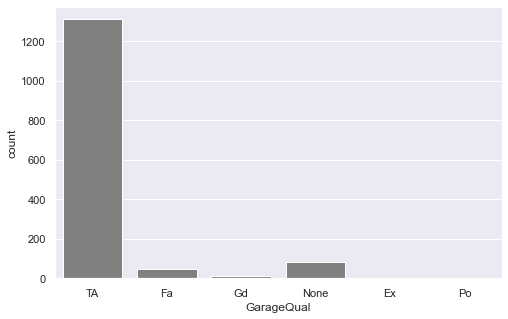

In [96]:
sns.countplot(df['GarageQual'], color = 'gray')

### Column: GarageCond
Garage condition

- Ex - Excellent
- Gd - Good
- TA - Typical/Average
- Fa - Fair
- Po - Poor
- NA - No Garage

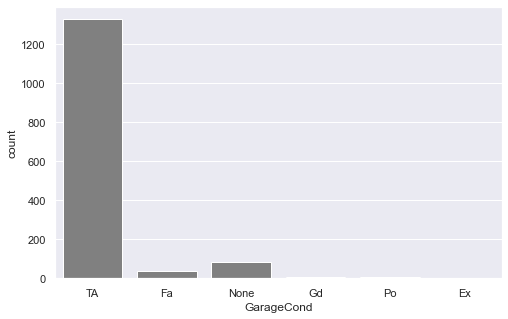

In [97]:
sns.countplot(df['GarageCond'], color = 'gray')

### Column: PavedDrive
Paved driveway

- Y - Paved 
- P - Partial Pavement
- N - Dirt/Gravel

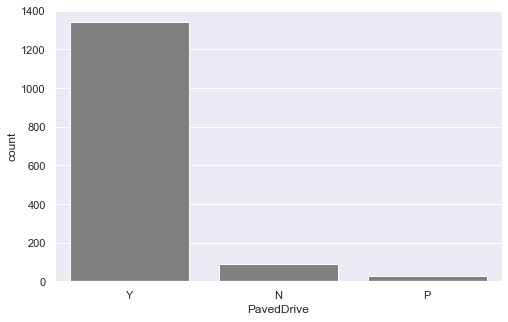

In [98]:
sns.countplot(df['PavedDrive'], color = 'gray')

### Column: WoodDeckSF
Wood deck area in square feet

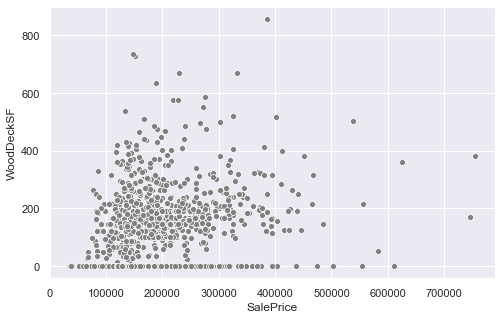

In [99]:
sns.scatterplot(x = "SalePrice", y = "WoodDeckSF", data = df, color = "gray")

### Column: OpenPorchSF
Open porch area in square feet

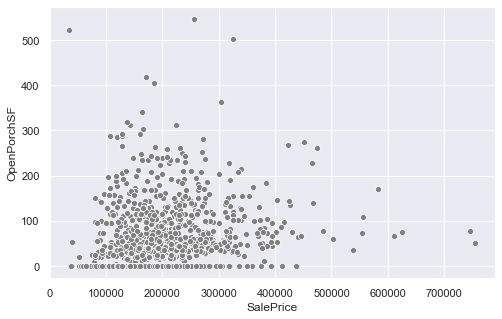

In [100]:
sns.scatterplot(x = "SalePrice", y = "OpenPorchSF", data = df, color = "gray")

### Column: EnclosedPorch
Enclosed porch area in square feet

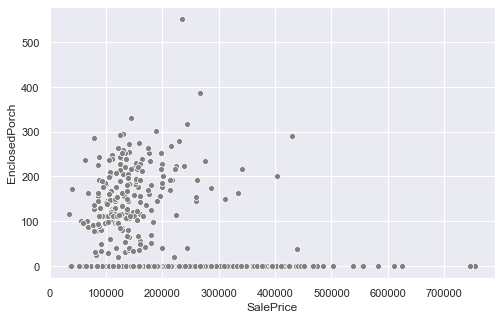

In [101]:
sns.scatterplot(x = "SalePrice", y = "EnclosedPorch", data = df, color = "gray")

### Column: 3SsnPorch
Three season porch area in square feet

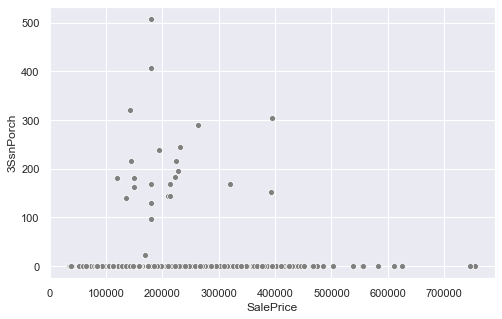

In [102]:
sns.scatterplot(x = "SalePrice", y = "3SsnPorch", data = df, color = "gray")

### Column: ScreenPorch
Screen porch area in square feet

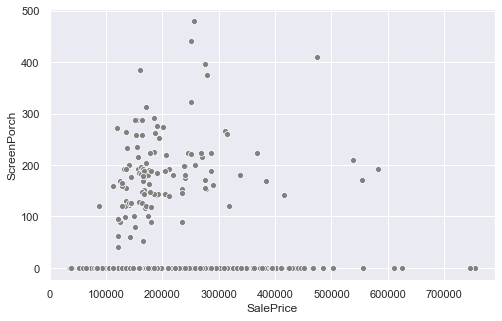

In [103]:
sns.scatterplot(x = "SalePrice", y = "ScreenPorch", data = df, color = "gray")

### Column: PoolArea
Pool area in square feet

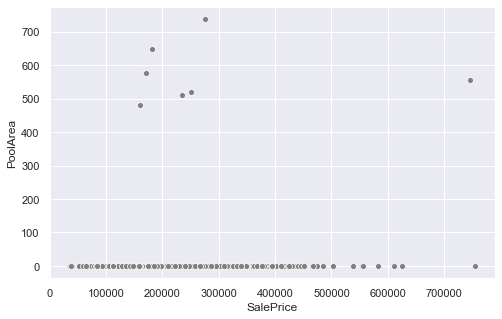

In [104]:
sns.scatterplot(x = "SalePrice", y = "PoolArea", data = df, color = "gray")

### Column: MiscVal
$Value of miscellaneous feature

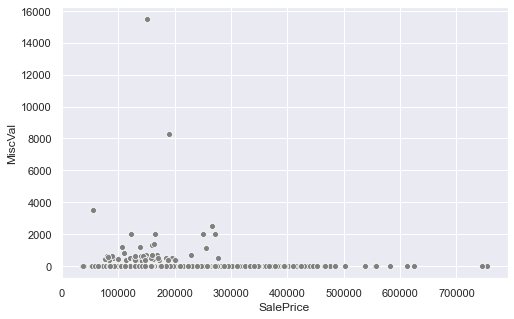

In [105]:
sns.scatterplot(x = "SalePrice", y = "MiscVal", data = df, color = "gray")

### Column: MoSold
Month Sold (MM)

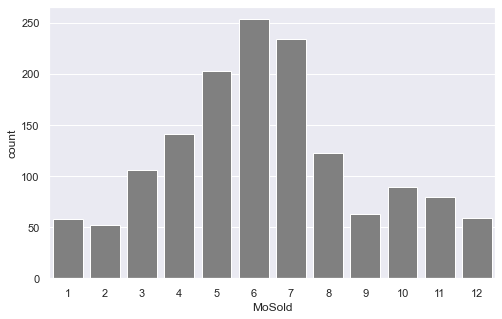

In [106]:
sns.countplot(df['MoSold'], color = 'gray')

### Column: YrSold
Year Sold (YYYY)

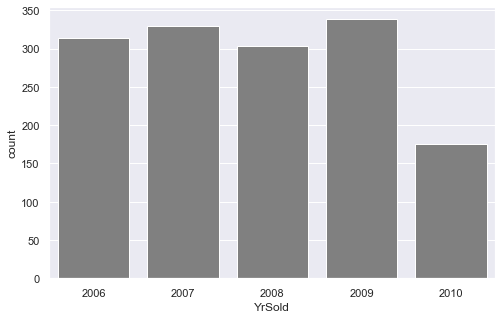

In [107]:
sns.countplot(df['YrSold'], color = 'gray')

### Column: SaleType
Type of sale

- WD - Warranty Deed - Conventional
- CWD - Warranty Deed - Cash
- VWD - Warranty Deed - VA Loan
- New - Home just constructed and sold
- COD - Court Officer Deed/Estate
- Con - Contract 15% Down payment regular terms
- ConLw - Contract Low Down payment and low interest
- ConLI - Contract Low Interest
- ConLD - Contract Low Down
- Oth - Other

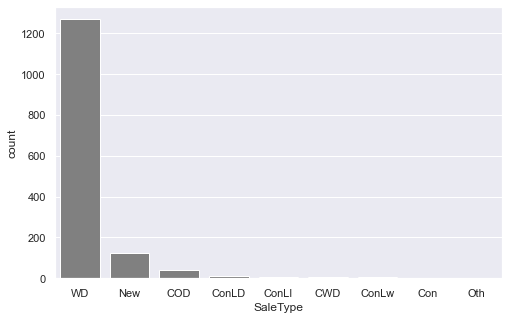

In [108]:
sns.countplot(df['SaleType'], color = 'gray')

### Column: SaleCondition 
Condition of sale

- Normal - Normal Sale
- Abnorml - Abnormal Sale -  trade, foreclosure, short sale
- AdjLand - Adjoining Land Purchase
- Alloca - Allocation - two linked properties with separate deeds, typically condo with a garage unit	
- Family - Sale between family members
- Partial - Home was not completed when last assessed (associated with New Homes)

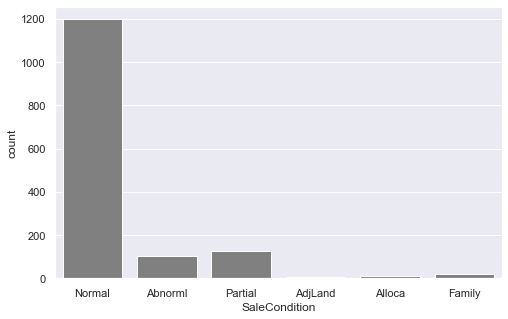

In [109]:
sns.countplot(df['SaleCondition'], color = 'gray')

# Feature Engineering

In [110]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [111]:
df['Remodel'] = df['YearBuilt'] != df['YearRemodAdd']
df['Remodel'] = df['Remodel'].astype(int)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodel
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,0


In [112]:
df_test['Remodel'] = df_test['YearBuilt'] != df_test['YearRemodAdd']
df_test['Remodel'] = df_test['Remodel'].astype(int)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodel
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,1
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,0


In [113]:
today = date.today()
def calculate_age(YearBuilt):
    YearBuilt = str(YearBuilt)
    built = datetime.strptime(YearBuilt, "%Y").date()
    return today.year - built.year 

In [114]:
df['HouseAge'] = df['YearBuilt'].apply(calculate_age)
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodel,HouseAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,0,17
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,0,44
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,1,19
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,1,105
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,0,20


In [115]:
df_test['HouseAge'] = df_test['YearBuilt'].apply(calculate_age)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodel,HouseAge
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,0,59
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,0,62
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,1,23
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,0,22
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,0,28


In [116]:
df.drop('YearBuilt', axis = 1, inplace = True)
df.drop('YearRemodAdd', axis = 1, inplace = True)

df_test.drop('YearBuilt', axis = 1, inplace = True)
df_test.drop('YearRemodAdd', axis = 1, inplace = True)

In [117]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodel,HouseAge
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,0,17
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,0,44
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,1,19
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,1,105
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,0,20


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  RoofStyl

# Model Training

In [119]:
x_train = df[[col for col in df.columns if col not in ['SalePrice', 'Id']]]
y_train = df['SalePrice']

In [120]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Remodel,HouseAge
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,0,17
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,0,44
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,1,19
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,1,105
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,0,20


In [121]:
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [122]:
x_train = pd.get_dummies(x_train)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 300 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int32(1), int64(32), uint8(264)
memory usage: 832.2 KB


In [123]:
# Intializing the Model
clf = RandomForestClassifier(max_depth=500, random_state=0)

In [124]:
# Train the Model
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=500, random_state=0)

# Model Testing

In [125]:
x_test = df[[col for col in df_test.columns if col not in ['SalePrice', 'Id']]]
x_test = pd.get_dummies(x_test)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 300 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int32(1), int64(32), uint8(264)
memory usage: 832.2 KB


In [126]:
x_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodel,HouseAge,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFini

In [127]:
prices = clf.predict(x_test)

In [128]:
prices

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

# Viewing the Sample Submission File

In [129]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [130]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


# Generating the Submission File

In [131]:
output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prices})
output.head()

,Id,SalePrice
0,1461,208500
1,1462,181500
2,1463,223500
3,1464,140000
4,1465,250000


In [132]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         1459 non-null   int64
 1   SalePrice  1459 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [133]:
output.to_csv('Submission_RandomForest.csv', index=False)